In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#####Links Used:
#https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
#https://www.datasklr.com/principal-component-analysis-and-factor-analysis/principal-component-analysis
#https://cmdlinetips.com/2018/03/pca-example-in-python-with-scikit-learn/
#https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot


In [3]:

##WHEN WE START TRAIN/TEST SPLIT REF.: https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/


In [192]:
initData = pd.read_csv("pca_data_davis_cleaned.csv")
initData.head()

,Unnamed: 0,doubleFold,pH,sec_Mn,sec_Mw,sec_polydispersity,tens_energyAbsorp_avg,tens_maxLoad_avg,tens_strainMaxLoad_avg,tens_stressMaxLoad_avg,tens_thickness_avg,tens_youngsMod_avg
0,9,10.0,5.065000,44.1,127.6,2.890,0.068927,28.159419,0.046616,23.102106,0.118950,1960.082957
1,10,10.0,4.830000,35.9,85.4,2.377,0.020220,11.903608,0.026067,9.019922,0.132200,1248.737847
2,11,10.0,5.206667,20.1,93.4,4.653,0.031949,15.555134,0.032685,12.233377,0.126433,1815.875375
3,12,10.0,5.165000,29.5,91.2,3.094,0.052825,22.858836,0.040784,18.063687,0.121600,1908.392582
4,13,10.0,6.405000,76.8,161.6,2.105,0.034338,11.970791,0.041122,12.906413,0.092900,1350.469421


In [193]:
cleanedData = initData.drop(axis=1, columns = ["Unnamed: 0", "doubleFold"])
##Dropped doubleFold because it is a variable, not very accurate measure

In [194]:
cleanedData.head()

,pH,sec_Mn,sec_Mw,sec_polydispersity,tens_energyAbsorp_avg,tens_maxLoad_avg,tens_strainMaxLoad_avg,tens_stressMaxLoad_avg,tens_thickness_avg,tens_youngsMod_avg
0,5.065000,44.1,127.6,2.890,0.068927,28.159419,0.046616,23.102106,0.118950,1960.082957
1,4.830000,35.9,85.4,2.377,0.020220,11.903608,0.026067,9.019922,0.132200,1248.737847
2,5.206667,20.1,93.4,4.653,0.031949,15.555134,0.032685,12.233377,0.126433,1815.875375
3,5.165000,29.5,91.2,3.094,0.052825,22.858836,0.040784,18.063687,0.121600,1908.392582
4,6.405000,76.8,161.6,2.105,0.034338,11.970791,0.041122,12.906413,0.092900,1350.469421


Index(['pH', 'sec_Mn', 'sec_Mw', 'sec_polydispersity', 'tens_energyAbsorp_avg',
       'tens_maxLoad_avg', 'tens_strainMaxLoad_avg', 'tens_stressMaxLoad_avg',
       'tens_thickness_avg', 'tens_youngsMod_avg'],
      dtype='object')

In [195]:
cleanedData.shape

(482, 10)

# Ask Fenella and Andrew youngsMod NaNs (blank cells)

### fill with median or drop or something else

In [196]:
cleanedData[cleanedData.isnull().any(axis=1)]

,pH,sec_Mn,sec_Mw,sec_polydispersity,tens_energyAbsorp_avg,tens_maxLoad_avg,tens_strainMaxLoad_avg,tens_stressMaxLoad_avg,tens_thickness_avg,tens_youngsMod_avg


## FOR NOW: drop rows that have nan

In [197]:
cleanedData = cleanedData.dropna()
cleanedData.shape

(482, 10)

In [198]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [199]:
pipeline = Pipeline([
    ('scaling', StandardScaler()), ('normalize', Normalizer())  
])

##

In [200]:
##Scree code:

screePipe = pipeline.fit_transform(cleanedData)
scree_pca = PCA(n_components=5)

In [201]:
screeFitTransf=scree_pca.fit_transform(screePipe)

In [202]:
screeFitTransf

array([[ 0.95008867,  0.43844895,  0.06898693,  0.26939853, -0.02021078],
       [-0.82670241,  0.43247815, -0.06426931,  0.12659533, -0.18328841],
       [-0.50633225,  0.06081891,  0.59761317,  0.56078583, -0.10680717],
       ...,
       [ 0.63018235, -0.76783294, -0.04378941,  0.15123922, -0.19802056],
       [ 0.94780173, -0.32579598,  0.1893587 ,  0.2911814 , -0.12664631],
       [ 0.71125717, -0.62784733,  0.12514662, -0.21226608,  0.10764803]])

In [203]:
scree_df = pd.DataFrame(data = screeFitTransf, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5'])

In [204]:
scree_df.head()

,PC 1,PC 2,PC 3,PC 4,PC 5
0,0.950089,0.438449,0.068987,0.269399,-0.020211
1,-0.826702,0.432478,-0.064269,0.126595,-0.183288
2,-0.506332,0.060819,0.597613,0.560786,-0.106807
3,0.020899,0.465022,0.624310,0.418567,0.290505
4,-0.013556,0.468299,-0.623792,0.587758,-0.314308


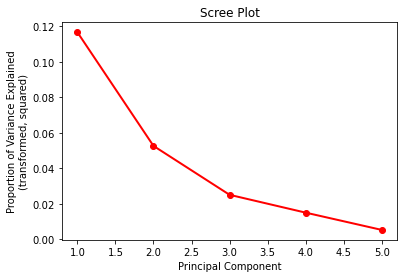

In [205]:
###Scree Plot

import matplotlib.pyplot as plt

scree_PC_Values = np.arange(scree_pca.n_components_) + 1
plt.plot(scree_PC_Values, np.square(scree_pca.explained_variance_ratio_), 'ro-', linewidth=2)
###We transformed the scree plot by squaring the variance explained to make the "ideal" PC more apparent
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained\n(transformed, squared)')
plt.show()

We gathered from the scree plot that we should try 3 principal components in our PCA model

## Actual PCA Model

In [233]:
cleanedData_columnNames= cleanedData.columns
cleanedData_columnNames

Index(['pH', 'sec_Mn', 'sec_Mw', 'sec_polydispersity', 'tens_energyAbsorp_avg',
       'tens_maxLoad_avg', 'tens_strainMaxLoad_avg', 'tens_stressMaxLoad_avg',
       'tens_thickness_avg', 'tens_youngsMod_avg'],
      dtype='object')

In [234]:
scaleNormPipe = pipeline.fit_transform(cleanedData)

In [246]:
##Trying something new based on https://ostwalprasad.github.io/machine-learning/PCA-using-python.html
##(with feature labels included in df)
pca_df = pd.DataFrame(data = scaleNormPipe, columns = cleanedData_columnNames)

In [259]:
pca_df.head()

,pH,sec_Mn,sec_Mw,sec_polydispersity,tens_energyAbsorp_avg,tens_maxLoad_avg,tens_strainMaxLoad_avg,tens_stressMaxLoad_avg,tens_thickness_avg,tens_youngsMod_avg
0,0.132511,0.329199,0.359491,0.120025,0.356148,0.450898,0.515260,0.328520,0.055547,-0.154190
1,-0.030291,0.012640,-0.039161,-0.103422,-0.340646,-0.468040,-0.341700,-0.525913,0.223101,-0.456590
2,0.143931,-0.331613,0.005833,0.693178,-0.227354,-0.330190,-0.151491,-0.391744,0.149382,-0.171304
3,0.413200,-0.419313,-0.024343,0.472740,0.062112,0.046802,0.371746,-0.260510,0.245440,-0.396253
4,0.465823,0.599137,0.273350,-0.136789,-0.131566,-0.329686,0.081191,-0.234858,-0.247225,-0.285900


In [252]:
pca = PCA(n_components=3)

In [249]:
#pcaFitTransf=pca.fit_transform(pca_df)

In [253]:
pcaFitTransf=pca.fit_transform(scaleNormPipe)

In [254]:
pcaFitTransf

array([[ 0.95008867,  0.43844895,  0.06898693],
       [-0.82670241,  0.43247815, -0.06426931],
       [-0.50633225,  0.06081891,  0.59761317],
       ...,
       [ 0.63018235, -0.76783294, -0.04378941],
       [ 0.94780173, -0.32579598,  0.1893587 ],
       [ 0.71125717, -0.62784733,  0.12514662]])

In [241]:
y = pca_df.columns

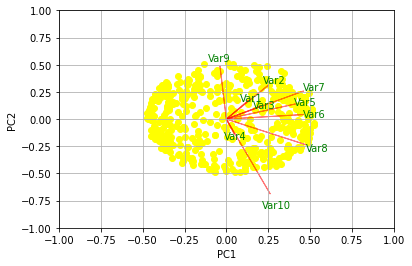

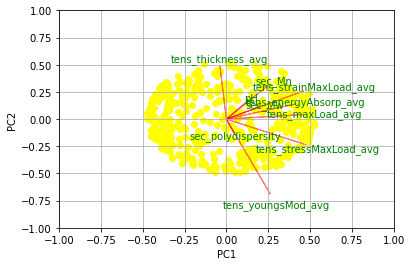

In [258]:

# iris = datasets.load_iris()
# X = iris.data
# y = iris.target

# # In general, it's a good idea to scale the data prior to PCA.

# X=scaler.fit_transform(X)    
# pca = PCA()
# x_new = pca.fit_transform(X)
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = "yellow")
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1)) #PCA 1
    plt.ylabel("PC{}".format(2)) #PCA 2
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(pcaFitTransf[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = "yellow")
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(pcaFitTransf[:,0:2],np.transpose(pca.components_[0:2, :]), list(y))
plt.show()

## SVD Attempt

In [ ]:
##    scores = cross_val_score(
##    classifier,
##    X_train,
##    y_train,
##    cv=10,
##    scoring='accuracy',
##    n_jobs=-1)

In [244]:
# ###Loading Plot

# # Plot explained variance
# fig, ax = pca.plot()

# # Scatter first 5 PCs
# fig, ax = pca.scatter()

# # Make biplot with the number of features
# fig, ax = pca.biplot(n_feat=11)

In [138]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(cleanedData)
# ##reference: https://datascienceplus.com/principal-component-analysis-pca-with-python/

In [23]:
#scaled_data = scaler.transform(cleanedData)

In [ ]:
#scaled_data[0]